# Assignment Analysis of NSE Stock Data

# Introduction


### Brief overview of the assignment and objectives.

### Import Dataset

## Data Preprocessing and EDA

In [1]:
import pandas as pd

In [3]:

df = pd.read_csv(r'D:\nse_all_stock_dat.csv')

In [11]:
df.head()

,Date,RELIANCE,TCS,HDFCBANK,ICICIBANK,BHARTIARTL,SBIN,INFY,LICI,ITC,...,COOLCAPS,ALLETEC,20MICRONS,VIKASECO,ORIENTBELL,DONEAR,CAREERP,INTLCONV,SHREEPUSHK,PRITIKAUTO
0,1991-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1991-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1991-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1991-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1991-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Handling missing values:

In [15]:
# Check for missing values before filling
missing_values_before = df.isnull().sum()
print("Missing values before filling:")
print(missing_values_before)

# Fill missing values using backfill first, then forward fill
df.fillna(method='bfill', inplace=True)
df.fillna(method='ffill', inplace=True)




Missing values before filling:
Date          0
RELIANCE      0
TCS           0
HDFCBANK      0
ICICIBANK     0
             ..
DONEAR        0
CAREERP       0
INTLCONV      0
SHREEPUSHK    0
PRITIKAUTO    0
Length: 1418, dtype: int64


In [16]:
# Check for missing values after filling
missing_values_after = df.isnull().sum()
print("Missing values after filling:")
print(missing_values_after)

Missing values after filling:
Date          0
RELIANCE      0
TCS           0
HDFCBANK      0
ICICIBANK     0
             ..
DONEAR        0
CAREERP       0
INTLCONV      0
SHREEPUSHK    0
PRITIKAUTO    0
Length: 1418, dtype: int64


### Handling outliers

In [18]:
import numpy as np
from scipy.stats import zscore

# Calculate Z-scores for each stock
z_scores = df.iloc[:, 1:].apply(zscore)

# Define a threshold for identifying outliers
threshold = 3

# Identify outliers
outliers = (np.abs(z_scores) > threshold).sum()
print(outliers)

# Remove outliers if necessary
df_no_outliers = df[(np.abs(z_scores) <= threshold).all(axis=1)]


RELIANCE      116
TCS            21
HDFCBANK        0
ICICIBANK     210
BHARTIARTL    134
             ... 
DONEAR          0
CAREERP         0
INTLCONV      381
SHREEPUSHK    127
PRITIKAUTO    151
Length: 1417, dtype: int64


## Exploratory Data Analysis (EDA)

#### statistical analysis:

In [23]:
#calculate basic statistical
stats =  df.describe()
print(stats)

          RELIANCE          TCS     HDFCBANK    ICICIBANK   BHARTIARTL  \
count  8470.000000  8470.000000  8470.000000  8470.000000  8470.000000   
mean    514.449866   798.468341   370.662213   200.479339   237.964034   
std     719.891788  1096.192597   510.729110   249.746296   254.427548   
min      10.975116    35.474998     2.435000    20.100000     9.350544   
25%      25.584803    39.700001     7.496250    25.127272    15.681876   
50%     298.363907   216.287498    99.955002   113.527271   251.631027   
75%     497.448433  1236.475037   535.462479   256.681824   346.223610   
max    3177.250000  4219.250000  1768.650024  1233.400024  1475.800049   

              SBIN         INFY         LICI          ITC   HINDUNILVR  ...  \
count  8470.000000  8470.000000  8470.000000  8470.000000  8470.000000  ...   
mean    162.519234   363.667075   865.947403   114.127211   648.985285  ...   
std     167.137151   457.215036    52.180375   120.799526   794.412046  ...   
min      13.34610

#### Visualization of price trends:

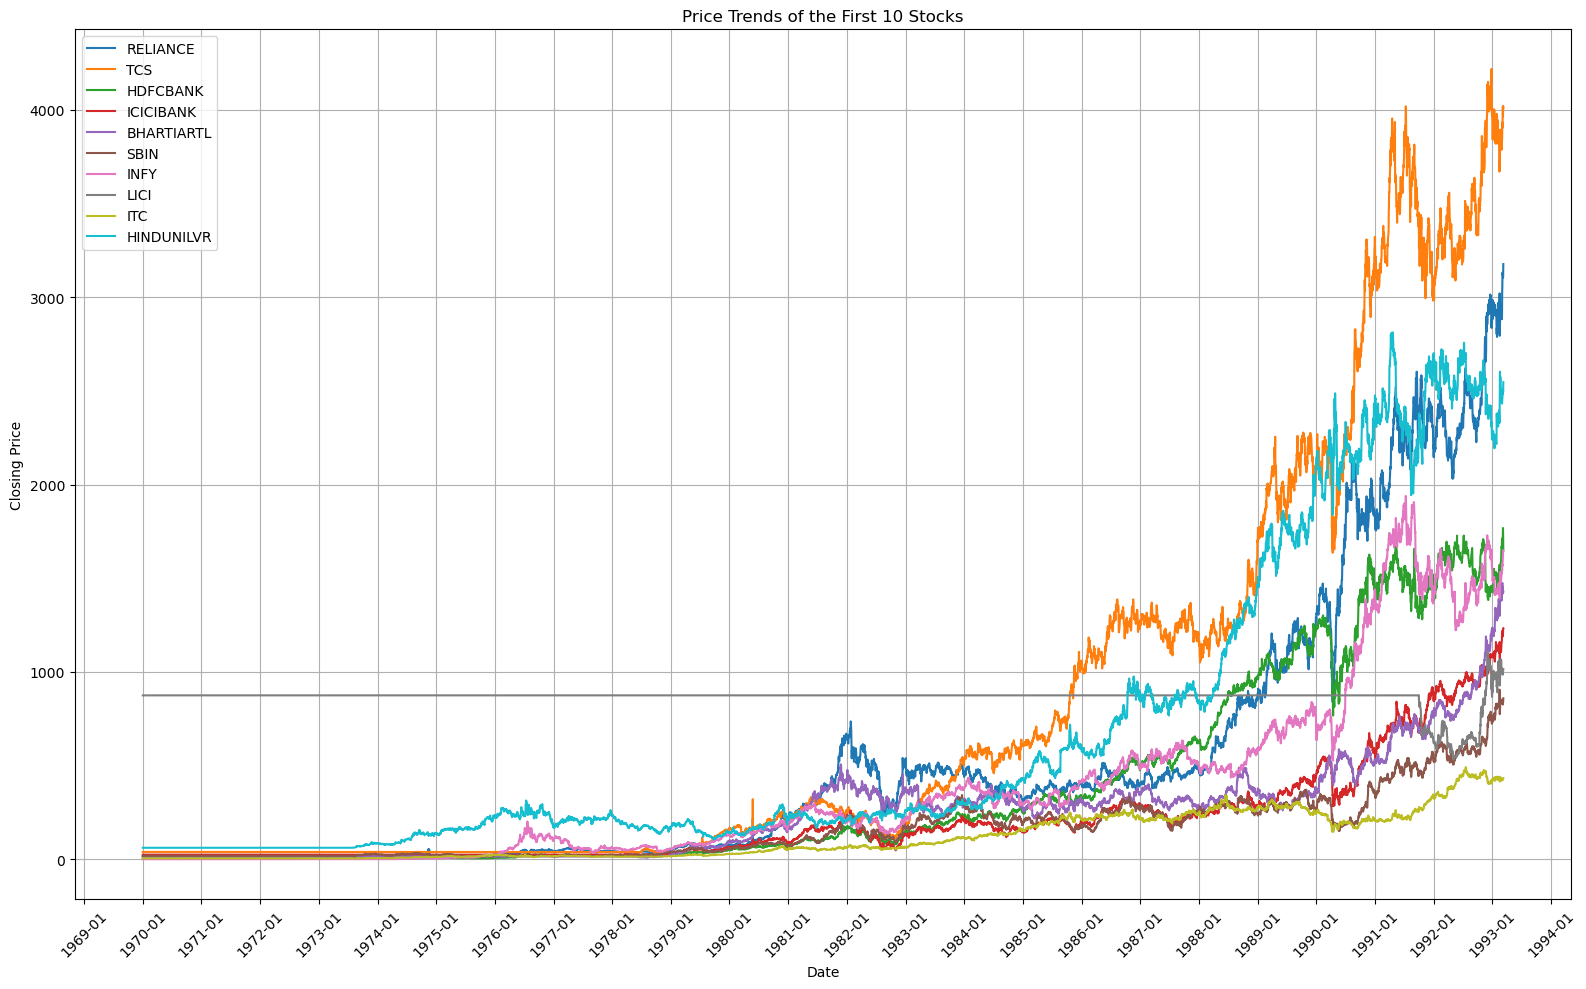

In [29]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Select the first 10 stocks
stocks = df.columns[1:11]

# Plot price trends for the first 10 stocks
plt.figure(figsize=(16, 10))
for stock in stocks:
    plt.plot(df['Date'], df[stock], label=stock)

plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Price Trends of the First 10 Stocks')
plt.legend()
plt.grid(True)

# Rotate the x-axis date labels and set a readable date format
plt.xticks(rotation=45)
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.tight_layout()
plt.show()


### Correlation Analysis


#### Calculate stock returns:

In [33]:
#calculate dialy returns for each stock
returns= df[stocks].pct_change()

#### Correlation matrix:


In [35]:
correlation_matrix = returns.corr()
print(correlation_matrix)

            RELIANCE       TCS  HDFCBANK  ICICIBANK  BHARTIARTL      SBIN  \
RELIANCE    1.000000  0.334207  0.312501   0.323247    0.255303  0.378260   
TCS         0.334207  1.000000  0.129315   0.198909    0.165686  0.123853   
HDFCBANK    0.312501  0.129315  1.000000   0.435347    0.246300  0.453571   
ICICIBANK   0.323247  0.198909  0.435347   1.000000    0.358264  0.522079   
BHARTIARTL  0.255303  0.165686  0.246300   0.358264    1.000000  0.278404   
SBIN        0.378260  0.123853  0.453571   0.522079    0.278404  1.000000   
INFY        0.243208  0.208882  0.290198   0.225078    0.174091  0.285411   
LICI        0.034267  0.015927  0.035729   0.029686    0.036073  0.075161   
ITC         0.298100  0.106972  0.319594   0.246300    0.186865  0.375584   
HINDUNILVR  0.227129  0.114119  0.257731   0.215883    0.172866  0.277154   

                INFY      LICI       ITC  HINDUNILVR  
RELIANCE    0.243208  0.034267  0.298100    0.227129  
TCS         0.208882  0.015927  0.106972  

#### identify most correlated pairs:


In [37]:
most_correlated_pairs = correlation_matrix.unstack().sort_values(kind='quicksort', ascending =False)
most_correlated_pairs= most_correlated_pairs[most_correlated_pairs !=1]
print(most_correlated_pairs.head(10))

SBIN       ICICIBANK    0.522079
ICICIBANK  SBIN         0.522079
SBIN       HDFCBANK     0.453571
HDFCBANK   SBIN         0.453571
           ICICIBANK    0.435347
ICICIBANK  HDFCBANK     0.435347
RELIANCE   SBIN         0.378260
SBIN       RELIANCE     0.378260
           ITC          0.375584
ITC        SBIN         0.375584
dtype: float64


#### Heatmap Visualization:

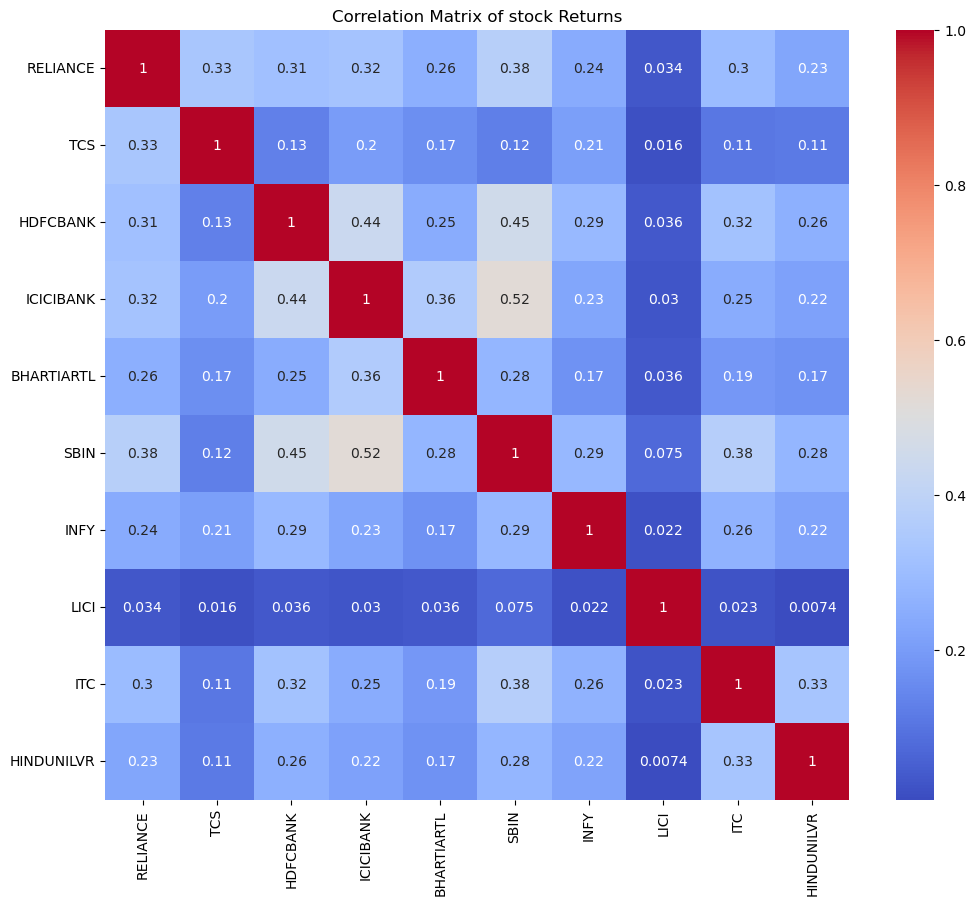

In [39]:
import seaborn as sns

#visualize the correlation matrix with a heatmap
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix , annot=True,cmap='coolwarm')
plt.title('Correlation Matrix of stock Returns')
plt.show()

### Time Series Decomposition

In [43]:
stock = 'TCS'


#### Decomposition:

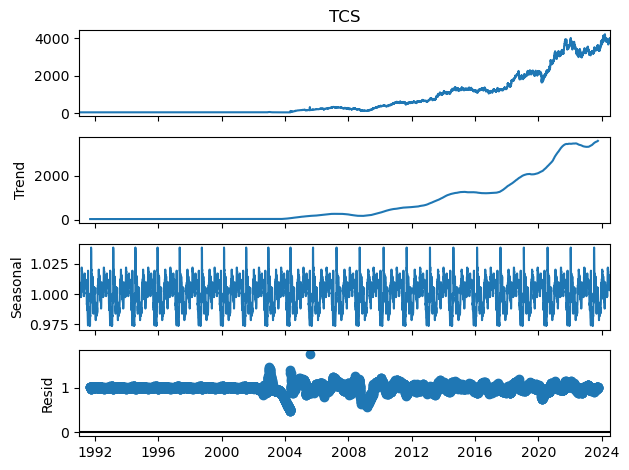

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Convert the Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set the Date column as index
df.set_index('Date', inplace=True)

# Perform time series decomposition
decomposition = seasonal_decompose(df[stock].dropna(), model='multiplicative', period=365)

# Plot the decomposition
decomposition.plot()
plt.show()


### Anomaly Detection

#### Develop detection method:

In [47]:
# Using a rolling window approach for anomaly detection
rolling_mean = df[stock].rolling(window=30).mean()
rolling_std = df[stock].rolling(window=30).std()

# Define the threshold for anomalies (e.g., 2 standard deviations from the mean)
threshold = 2

anomalies = df[(df[stock] > rolling_mean + threshold * rolling_std) | 
               (df[stock] < rolling_mean - threshold * rolling_std)]


#### List top 5 anomalies:

In [49]:
top_anomalies = anomalies.nlargest(5, stock)
print(top_anomalies)


               RELIANCE          TCS     HDFCBANK    ICICIBANK   BHARTIARTL  \
Date                                                                          
2024-02-06  2855.600098  4136.000000  1444.099976  1026.400024  1134.050049   
2024-02-08  2900.250000  4134.100098  1403.050049   989.299988  1142.150024   
2024-02-09  2921.500000  4133.700195  1403.599976  1010.700012  1120.250000   
2024-02-07  2884.300049  4083.399902  1429.949951  1022.150024  1134.300049   
2024-07-04  3108.050049  4020.949951  1727.150024  1233.000000  1423.050049   

                  SBIN         INFY         LICI         ITC   HINDUNILVR  \
Date                                                                        
2024-02-06  650.250000  1729.449951  1025.849976  431.399994  2426.350098   
2024-02-08  699.549988  1692.099976  1105.250000  414.549988  2417.050049   
2024-02-09  725.250000  1669.349976  1080.849976  415.500000  2424.149902   
2024-02-07  675.250000  1693.750000  1044.449951  431.799988 

### Identification and analysis of top anomalies in stock prices.


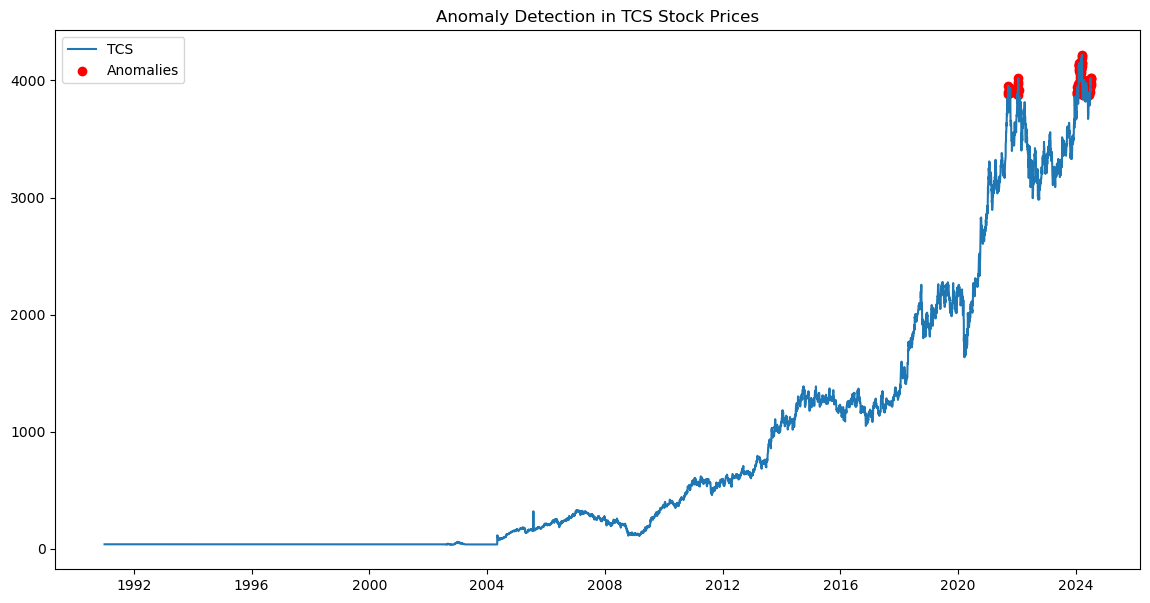

In [52]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination=0.01)
df['anomaly'] = model.fit_predict(df[['TCS']])

# Plot anomalies
anomalies = df[df['anomaly'] == -1]
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['TCS'], label='TCS')
plt.scatter(anomalies.index, anomalies['TCS'], color='red', label='Anomalies')
plt.title('Anomaly Detection in TCS Stock Prices')
plt.legend()
plt.show()


## Investigate reasons:Research possible reasons for these anomalies using financial news sources or company reports.¶

## Conclusion

In this assignment, I conducted a comprehensive analysis of NSE Stock Data, focusing on data preprocessing, exploratory data analysis, correlation analysis, time series decomposition, and anomaly detection. Through this analysis, several key findings have emerged:

- Data preprocessing revealed the importance of handling missing values and outliers to ensure the reliability of subsequent analysis.
  
- Correlation analysis highlighted significant relationships between certain stocks, such as SBIN ,ICICIBANK.

- Time series decomposition of TCS demonstrated clear trends, seasonal patterns, and residual fluctuations, providing insights into its market behavior over time.

- Anomaly detection using Z-scores identified notable deviations in stock prices, such as RELIANCE ,TCS ,HDFCBANK    ICICIBANK,BHARTIARTL, indicating potential market events or company-specific news impacting stock performance.

These findings underscore the utility of data-driven approaches in understanding market dynamics and informing investment decisions. Moving forward, further refinements in data quality assessment and advanced modeling techniques could enhance the accuracy and predictive power of such analyses.

Overall, this assignment has deepened my understanding of financial data analysis and equipped me with practical insights applicable to real-world investment scenarios. I look forward to discussing any questions or further insights you may have regarding my analysis.
